<a href="https://colab.research.google.com/github/ravishankar-cloud/machine-learning/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random


np.random.seed(0)




(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
 
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))




print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 


X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
# Define the Le_Net model function
def leNet_model():
  model=Sequential()
  model.add(Conv2D(30,[5,5],input_shape=(28,28,1),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,[3,3],activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation="softmax"))
  model.compile(Adam(lr=0.01),loss="categorical_crossentropy",metrics=['accuracy'])
  return model




In [ ]:
model=leNet_model()
print(model.summary())

In [27]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

Epoch 1/10
135/135 [==============================] - 55s 392ms/step - loss: 0.2276 - accuracy: 0.9276 - val_loss: 0.0516 - val_accuracy: 0.9857
Epoch 2/10
135/135 [==============================] - 75s 559ms/step - loss: 0.0684 - accuracy: 0.9785 - val_loss: 0.0370 - val_accuracy: 0.9892
Epoch 3/10
135/135 [==============================] - 37s 278ms/step - loss: 0.0526 - accuracy: 0.9834 - val_loss: 0.0329 - val_accuracy: 0.9910
Epoch 4/10
135/135 [==============================] - 34s 254ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0349 - val_accuracy: 0.9908
Epoch 5/10
135/135 [==============================] - 31s 231ms/step - loss: 0.0410 - accuracy: 0.9868 - val_loss: 0.0448 - val_accuracy: 0.9897
Epoch 6/10
135/135 [==============================] - 30s 226ms/step - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.0425 - val_accuracy: 0.9885
Epoch 7/10
135/135 [==============================] - 30s 226ms/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0377 - val_ac

Text(0.5, 0, 'epoch')

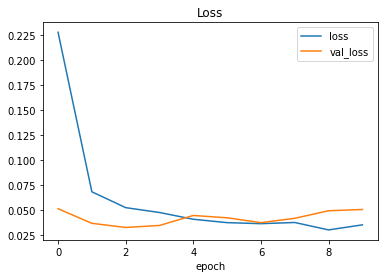

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 


Text(0.5, 0, 'epoch')

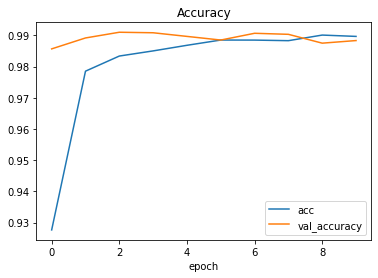

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

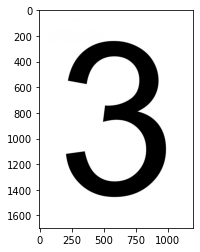

In [30]:
import requests
from PIL import Image
url="https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg"
response=requests.get(url,stream=True)
img=Image.open(response.raw)
plt.imshow(img)


(28, 28)


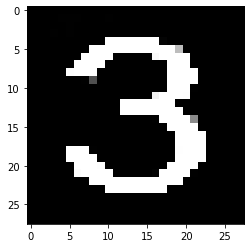

In [31]:
import cv2
img_array=np.asarray(img)
resized=cv2.resize(img_array,(28,28))
gray_scale=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)
image=cv2.bitwise_not(gray_scale)
plt.imshow(image,cmap=plt.get_cmap("gray"))

In [32]:
image=image/255
image=image.reshape(1,28,28,1)

In [33]:
prediction=model.predict(image)
p=np.argmax(prediction, axis=1)
print("prediction is", p)

1/1 [==============================] - 0s 63ms/step
prediction is [3]


In [34]:
score=model.evaluate(X_test,y_test,verbose=0)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

Test Score: 0.04572604224085808
Test Accuracy: 0.9865999817848206


In [38]:
layer1= Model(inputs=model.layers[0].input,outputs=model.layers[0].output)
layer2= Model(inputs=model.layers[0].input,outputs=model.layers[2].output)

visual_layer1,visual_layer2= layer1.predict(image),layer2.predict(image)
print(visual_layer1)
print(visual_layer2)

1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 88ms/step
[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ..

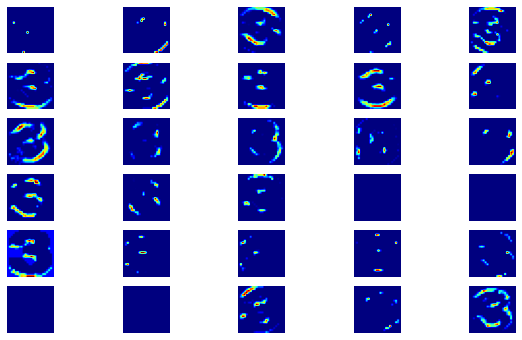

In [40]:
plt.figure(figsize=(10,6))
for i in range (30):
  plt.subplot(6,5,i+1)
  plt.imshow(visual_layer1[0,:,:, i],cmap=plt.get_cmap('jet'))
  plt.axis('off')

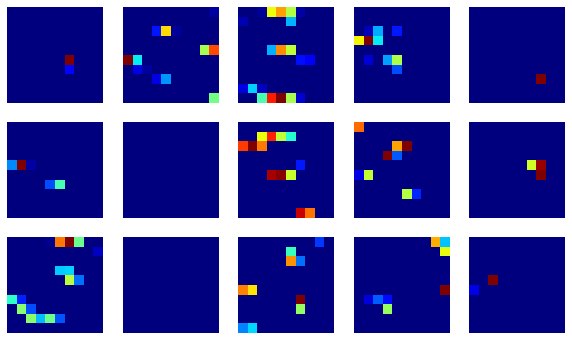

In [41]:
plt.figure(figsize=(10,6))
for i in range (15):
  plt.subplot(3,5,i+1)
  plt.imshow(visual_layer2[0,:,:, i],cmap=plt.get_cmap('jet'))
  plt.axis('off')